# Discretization or Binning

In machine learning, discretization or binning is a technique used to group or categorize continuous data into distinct intervals or bins. It's like dividing a range of values into several smaller groups or buckets.

Think of it like organizing items based on their size. Imagine you have a collection of fruits with different weights: 100 grams, 150 grams, 200 grams, 250 grams, and 300 grams. Instead of dealing with exact weights, you might want to group them into bins, like "100-149 grams," "150-199 grams," "200-249 grams," and "250-300 grams."

By discretizing or binning the data, you simplify it and make it easier to analyze. This can be useful in machine learning because it reduces the complexity of the problem and can sometimes lead to better predictions or insights. It's particularly helpful when dealing with data that has many different values, and you want to focus on patterns or trends that emerge across broader categories.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

df.dropna(inplace=True)
df.sample(5)

,Survived,Age,Fare
57,0,28.5,7.2292
50,0,7.0,39.6875
624,0,21.0,16.1000
499,0,24.0,7.7958
681,1,27.0,76.7292


In [3]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6153846153846154

In [6]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6288928012519561

In [7]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [8]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [9]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [10]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [11]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [12]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [13]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [14]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
515,47.0,13.0,34.0208,11.0,"(42.0, 47.0]","(31.275, 51.479]"
847,35.0,10.0,7.8958,3.0,"(32.0, 35.0]","(7.775, 7.896]"
251,29.0,7.0,10.4625,4.0,"(28.0, 30.0]","(8.158, 10.5]"
84,17.0,2.0,10.5000,5.0,"(16.0, 19.0]","(8.158, 10.5]"
151,22.0,4.0,66.6000,12.0,"(21.0, 23.0]","(51.479, 76.292]"


In [15]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6363636363636364

In [16]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6331768388106416

In [17]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.630281690140845


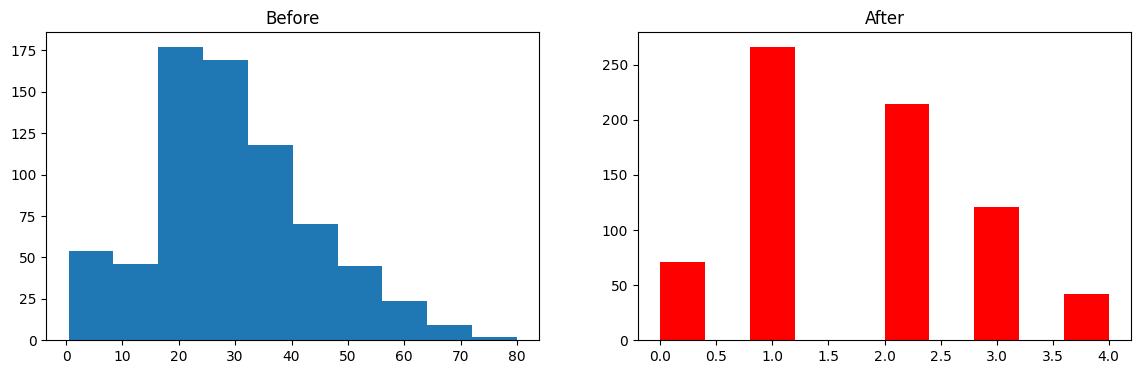

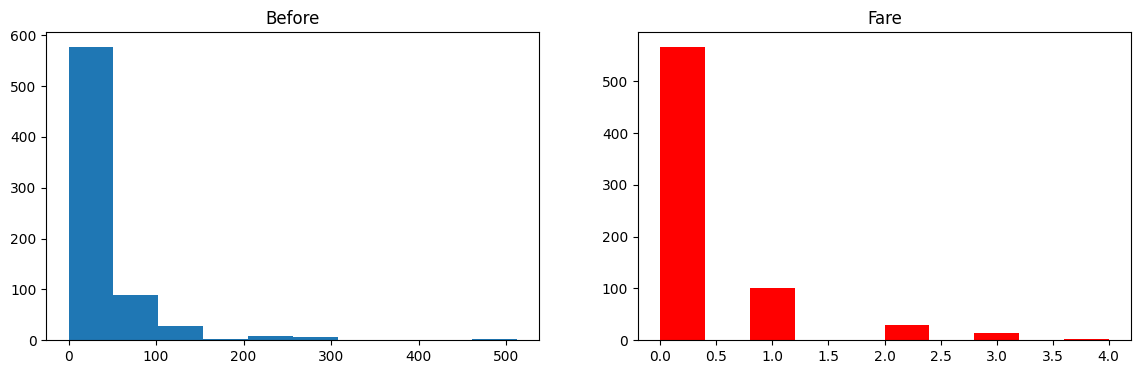

In [18]:
discretize(5,'kmeans')